In [103]:
print("Lesss go!!!")

Lesss go!!!


In [3]:
!pip install transformers datasets evaluate rouge_score loralib peft torch torchdata

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 20.7 MB/s eta 0:00:00
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=c92eecc1159acca4262ae4bdcec77f7e3d330c3bf5dc7ef9fb2c3df07befbc5c
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge_score
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fs

## Fine Tuning a Generative AI Model For Dialogue Summarization

Using FLAN-T5 LLM from Hugging Face , and Fine tuning it for my specific task of Dialogue Summarization and evaluate the results eith ROUGE metrics.

Using Two different approaches of fine tuning:
1. Full Fine Tuning
2. Parameter Efficient Fine Tuning (PEFT)
   


## Libraries

In [4]:
import pandas as pd
import numpy as np
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer, GenerationConfig, TrainingArguments, Trainer
import matplotlib.pyplot as plt
from datasets import load_dataset

## Loading the data

In [5]:
from datasets import load_dataset

dataset = load_dataset("knkarthick/dialogsum")
dataset

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/4.65k [00:00<?, ?B/s]

train.csv:   0%|          | 0.00/11.3M [00:00<?, ?B/s]

validation.csv:   0%|          | 0.00/442k [00:00<?, ?B/s]

test.csv:   0%|          | 0.00/1.35M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/12460 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/500 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1500 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'dialogue', 'summary', 'topic'],
        num_rows: 12460
    })
    validation: Dataset({
        features: ['id', 'dialogue', 'summary', 'topic'],
        num_rows: 500
    })
    test: Dataset({
        features: ['id', 'dialogue', 'summary', 'topic'],
        num_rows: 1500
    })
})

In [6]:
print("Training data", len(dataset["train"]))
print("Testing data", len(dataset["test"]))
print("Validation data", len(dataset["validation"]))

Training data 12460
Testing data 1500
Validation data 500


In [7]:
print("Training" ,dataset["train"].shape)
print("Testing" ,dataset["test"].shape)
print("Validation",dataset["validation"].shape)

Training (12460, 4)
Testing (1500, 4)
Validation (500, 4)


## Visualising entry of training dataset

In [8]:
def print_dash():
    dash =""
    for i in range(50):
        dash+=" _"
    print(dash)

def print_smaller_dash():
    dash =""
    for i in range(13):
        dash+=" _"
    print(dash)

In [9]:
import random
one_data = random.choice( dataset["train"] )

one_data_dialogue = one_data["dialogue"]
one_data_summary = one_data["summary"]

print_dash()
print(one_data_dialogue)
print_dash()
print(one_data_summary)

 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
#Person1#: Hi there! My name's Terry Graham. You're new around here, huh?
#Person2#: Yes. My name's Mark Benson. I just started a couple weeks ago.
#Person1#: Well, if there's anything I can do for you, let me know.
#Person2#: Thanks, I appreciate that!
 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
Terry and Mark introduce themselves to each other.


In [10]:
print("one data ",dataset["train"])
print("Number of features in training data is" ,len(dataset["train"][0]))

print_smaller_dash()
print("ID:\n\n " ,one_data["id"])
print_smaller_dash()
print("Dilogue:\n\n ",one_data["dialogue"])
print_smaller_dash()
print("Summary:\n\n ",one_data["summary"])
print_smaller_dash()
print("Topic:\n\n" ,one_data["topic"])

one data  Dataset({
    features: ['id', 'dialogue', 'summary', 'topic'],
    num_rows: 12460
})
Number of features in training data is 4
 _ _ _ _ _ _ _ _ _ _ _ _ _
ID:

  train_4469
 _ _ _ _ _ _ _ _ _ _ _ _ _
Dilogue:

  #Person1#: Hi there! My name's Terry Graham. You're new around here, huh?
#Person2#: Yes. My name's Mark Benson. I just started a couple weeks ago.
#Person1#: Well, if there's anything I can do for you, let me know.
#Person2#: Thanks, I appreciate that!
 _ _ _ _ _ _ _ _ _ _ _ _ _
Summary:

  Terry and Mark introduce themselves to each other.
 _ _ _ _ _ _ _ _ _ _ _ _ _
Topic:

 social meeting


## Loading LLM

In [11]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

In [12]:

from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

tokenizer = AutoTokenizer.from_pretrained("google/flan-t5-base")
model = AutoModelForSeq2SeqLM.from_pretrained("google/flan-t5-base")

original_model = AutoModelForSeq2SeqLM.from_pretrained("google/flan-t5-base")

tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

## Trying tokenizer

In [13]:
inputs = tokenizer("Hey I am priyam", return_tensors="pt")
# print(inputs)
print("Tokenized Output:")
print(inputs)
print("\n")

# Detokenize back to the original text


decoded_text = tokenizer.decode( inputs["input_ids"][0] , skip_special_tokens=True)
print("\nDetokenized Output:")
print(decoded_text)

Tokenized Output:
{'input_ids': tensor([[9459,   27,  183,    3, 2246,   63,  265,    1]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]])}



Detokenized Output:
Hey I am priyam


In [14]:
c=0
for name, param in model.named_parameters():
    print(f"Parameter Name: {name}, Shape: {param.shape}")
    c+=1
    if c==10:
        break

Parameter Name: shared.weight, Shape: torch.Size([32128, 768])
Parameter Name: encoder.block.0.layer.0.SelfAttention.q.weight, Shape: torch.Size([768, 768])
Parameter Name: encoder.block.0.layer.0.SelfAttention.k.weight, Shape: torch.Size([768, 768])
Parameter Name: encoder.block.0.layer.0.SelfAttention.v.weight, Shape: torch.Size([768, 768])
Parameter Name: encoder.block.0.layer.0.SelfAttention.o.weight, Shape: torch.Size([768, 768])
Parameter Name: encoder.block.0.layer.0.SelfAttention.relative_attention_bias.weight, Shape: torch.Size([32, 12])
Parameter Name: encoder.block.0.layer.0.layer_norm.weight, Shape: torch.Size([768])
Parameter Name: encoder.block.0.layer.1.DenseReluDense.wi_0.weight, Shape: torch.Size([2048, 768])
Parameter Name: encoder.block.0.layer.1.DenseReluDense.wi_1.weight, Shape: torch.Size([2048, 768])
Parameter Name: encoder.block.0.layer.1.DenseReluDense.wo.weight, Shape: torch.Size([768, 2048])


In [15]:
def print_number_of_trainable_model_params(model):
    trainable_model_params=0
    all_model_params=0
    for name , param in model.named_parameters():
        all_model_params += param.numel()
        if param.requires_grad:
            trainable_model_params+=param.numel()


    return trainable_model_params,all_model_params


In [16]:
trainable_model_params,all_model_params =print_number_of_trainable_model_params(model)
print("All model params" ,all_model_params)
print("Trainable model params" ,trainable_model_params)
print("Percentage of trainable model params" ,(trainable_model_params/all_model_params)*100,"%")

All model params 247577856
Trainable model params 247577856
Percentage of trainable model params 100.0 %


## 1. TESTING MODEL WITH ZERO SHOT INFERENCE

In [17]:
index = 200

test_dataset= dataset["test"]

dialogue = test_dataset[index]["dialogue"]
summary = test_dataset[index]["summary"]

prompt = f"""
Summarize the following conversation.

{dialogue}

Summary:
"""

inputs = tokenizer(prompt ,return_tensors="pt")
tokens_got = inputs["input_ids"][0]

model_prediction = original_model.generate(
    inputs["input_ids"] ,
    max_new_tokens=200
)
print("Model Prediction " ,model_prediction[0])

# decoding the tokens got from LLM
output = tokenizer.decode(
    model_prediction[0] ,
    skip_special_tokens=True
)


print_dash()
print(f"INPUT PROMPT:\n {prompt} ")
print_dash()
print(f"BASELINE HUMAN SUMMARY:\n" ,{summary})
print_dash()
print(f"MODEL GENERATION- ZERO SHOT:\n {output} ")

Model Prediction  tensor([    0,  1713,   345, 13515,   536,  4663,    10,    27,    31,    51,
         1631,    13, 21066,    82,  1218,     5,     1])
 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
INPUT PROMPT:
 
Summarize the following conversation.

#Person1#: Have you considered upgrading your system?
#Person2#: Yes, but I'm not sure what exactly I would need.
#Person1#: You could consider adding a painting program to your software. It would allow you to make up your own flyers and banners for advertising.
#Person2#: That would be a definite bonus.
#Person1#: You might also want to upgrade your hardware because it is pretty outdated now.
#Person2#: How can we do that?
#Person1#: You'd probably need a faster processor, to begin with. And you also need a more powerful hard disc, more memory and a faster modem. Do you have a CD-ROM drive?
#Person2#: No.
#Person1#: Then you might want to add a CD-ROM drive too, because most new s

## 2. Perform Full Fine Tuning

In [18]:
dataset["train"]

Dataset({
    features: ['id', 'dialogue', 'summary', 'topic'],
    num_rows: 12460
})

I want my dataset in the form of

Summarize thr following

[]

[]

[]

Summary:


## Preprocess the Dialog - SUmmary Dataset

In [19]:
def tokenize_function(example):
    start_prompt = "Summarize the following conversation.\n\n"
    end_prompt = "\n\nSummary: "
    #0. Creating prompt
    prompt = [start_prompt + dialogue + end_prompt for dialogue in example["dialogue"]]
    #1. Tokenize inputs
    input_encodings = tokenizer(prompt, padding="max_length", truncation=True, return_tensors="pt")
    #2. Tokenize labels
    label_encodings = tokenizer(example["summary"], padding="max_length", truncation=True, return_tensors="pt")

    #3. Add input_ids and labels to the example
    return {
        "input_ids": input_encodings["input_ids"],
        "labels": label_encodings["input_ids"],
    }


In [20]:
tokenized_train = dataset["train"].map(tokenize_function, batched=True)
tokenized_train = tokenized_train.remove_columns(["id","topic","summary","dialogue"])
tokenized_test = dataset["test"].map(tokenize_function, batched=True)
tokenized_test = tokenized_test.remove_columns(["id","topic","summary","dialogue"])
tokenized_validation = dataset["validation"].map(tokenize_function, batched=True)
tokenized_validation = tokenized_validation.remove_columns(["id","topic","summary","dialogue"])

Map:   0%|          | 0/12460 [00:00<?, ? examples/s]

Map:   0%|          | 0/1500 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

In [21]:
tokenized_train

Dataset({
    features: ['input_ids', 'labels'],
    num_rows: 12460
})

In [22]:
tokenized_test

Dataset({
    features: ['input_ids', 'labels'],
    num_rows: 1500
})

In [23]:
tokenized_validation

Dataset({
    features: ['input_ids', 'labels'],
    num_rows: 500
})

So I have 12460 ,1500, 500 data in train ,test and validation dat , using only 1% to train quickly.

## Using 1 percent of training , testing and validation for faster

In [24]:
tokenized_train = tokenized_train.filter(lambda example, index: index % 100 == 0, with_indices=True)
tokenized_test = tokenized_test.filter(lambda example, index: index % 100 == 0, with_indices=True)
tokenized_validation = tokenized_validation.filter(lambda example, index: index % 100 == 0, with_indices=True)

Filter:   0%|          | 0/12460 [00:00<?, ? examples/s]

Filter:   0%|          | 0/1500 [00:00<?, ? examples/s]

Filter:   0%|          | 0/500 [00:00<?, ? examples/s]

In [25]:
print("Training shape:",tokenized_train.shape)
print("Testing shape:",tokenized_test.shape)
print("Validation shape:",tokenized_validation.shape)

Training shape: (125, 2)
Testing shape: (15, 2)
Validation shape: (5, 2)


## Fine Tune the Model with the Preprocessed Dataset

In [26]:
import time
from transformers import Trainer
output_dir = f'./dialogue-summary-training-{str(int(time.time()))}'
training_args = TrainingArguments(
    output_dir=output_dir,
    learning_rate=1e-5,
    num_train_epochs=1,
    weight_decay=0.01,
    logging_steps=1,
    max_steps=1,
    run_name="dialogue-summary-experiment"
)





trainer = Trainer(
    model=original_model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset = tokenized_validation
)

Training the model , but it takes several hours since it is full Fine Tuning

In [ ]:
# trainer.train()

## Loading fully fine tuned model , since it would take ages

In [27]:
!pip install transformers huggingface_hub

In [28]:

from huggingface_hub import login
login(token="provide token here")

In [29]:
tokenizer.decode(tokenized_test[1]["input_ids"])

"Summarize the following conversation. #Person1#: OK, that's a cut! Let's start from the beginning, everyone. #Person2#: What was the problem that time? #Person1#: The feeling was all wrong, Mike. She is telling you that she doesn't want to see you any more, but I want to get more anger from you. You're acting hurt and sad, but that's not how your character would act in this situation. #Person2#: But Jason and Laura have been together for three years. Don't you think his reaction would be one of both anger and sadness? #Person1#: At this point, no. I think he would react the way most guys would, and then later on, we would see his real feelings. #Person2#: I'm not so sure about that. #Person1#: Let's try it my way, and you can see how you feel when you're saying your lines. After that, if it still doesn't feel right, we can try something else. Summary: </s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><

In [30]:
model_name = "truocpham/flan-dialogue-summary-checkpoint"

# Load model and tokenizer
instruct_model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

config.json:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/142 [00:00<?, ?B/s]

## Evaluating this fully Fine tuned Model (QUALITATIVE)

In [31]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

if device == "cuda":
    print(f"GPU Name: {torch.cuda.get_device_name(0)}")


Using device: cuda
GPU Name: Tesla T4


In [32]:
import torch
print("Is CUDA available:", torch.cuda.is_available())

Is CUDA available: True


In [33]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Move the models to GPU if available
original_model = original_model.to(device)
instruct_model = instruct_model.to(device)


# Select the data for testing
index = 200
dialogue = test_dataset[index]["dialogue"]
human_baseline_summary = test_dataset["summary"]

# Prepare the prompt with the dialogue and expected summary format
prompt = f"""
Summarize the following conversation.

{dialogue}

Summary:
"""

# Tokenize the prompt and move the tensor to GPU
input_ids = tokenizer(prompt, return_tensors="pt").input_ids.to(device)

# Make predictions with the original model
original_model_outputs = original_model.generate(input_ids=input_ids, max_new_tokens=200)
original_model_text_output = tokenizer.decode(original_model_outputs[0], skip_special_tokens=True)

# Make predictions with the fine-tuned instruct model
instruct_model_outputs = instruct_model.generate(input_ids=input_ids, max_new_tokens=200)
instruct_model_text_output = tokenizer.decode(instruct_model_outputs[0], skip_special_tokens=True)

# Print the outputs
print("Original Model Output:", original_model_text_output)
print("Instruct Model Output:", instruct_model_text_output)


Using device: cuda
Original Model Output: #Person1#: I'm thinking of upgrading my computer.
Instruct Model Output: #Person1# suggests #Person2# upgrading #Person2#'s system, hardware, and CD-ROM drive. #Person2# thinks it's great.


## Evaluating Quantitative

Predicting on first 10 test data and then finding the score

In [34]:
import evaluate
rouge = evaluate.load('rouge')

In [35]:
import torch

# # Check if GPU is available
# device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Move the models to GPU (if available) or CPU
original_model = original_model.to(device)
instruct_model = instruct_model.to(device)

# Select the data for testing
dialogues = test_dataset[0:10]['dialogue']
human_baseline_summaries = test_dataset[0:10]["summary"]

# original FLAN-T5 model
original_model_summaries = []
# fully fine-tuned model
instruct_model_summaries = []

for numbering, dialogue in enumerate(dialogues):
    prompt = f"""
Summarize the following conversation.

{dialogue}

Summary:"""

    # Tokenize the prompt and ensure it's on the same device as the model
    input_ids = tokenizer(prompt, return_tensors="pt").input_ids.to(device)

    # Original flan-t5 model prediction
    original_model_outputs = original_model.generate(input_ids, max_new_tokens=200)
    original_model_text_output = tokenizer.decode(original_model_outputs[0], skip_special_tokens=True)
    original_model_summaries.append(original_model_text_output)

    # Fine-tuned instruct model prediction
    instruct_model_outputs = instruct_model.generate(input_ids, max_new_tokens=200)
    instruct_model_text_output = tokenizer.decode(instruct_model_outputs[0], skip_special_tokens=True)
    instruct_model_summaries.append(instruct_model_text_output)


zipped_summaries = list(zip(human_baseline_summaries, original_model_summaries, instruct_model_summaries))

import pandas as pd
df = pd.DataFrame(zipped_summaries, columns=['human_baseline_summaries', 'original_model_summaries', 'instruct_model_summaries'])

df


Using device: cuda


,human_baseline_summaries,original_model_summaries,instruct_model_summaries
0,Ms. Dawson helps #Person1# to write a memo to ...,The memo is to be distributed to all employees...,#Person1# asks Ms. Dawson to take a dictation ...
1,In order to prevent employees from wasting tim...,The memo is to be distributed to all employees...,#Person1# asks Ms. Dawson to take a dictation ...
2,Ms. Dawson takes a dictation for #Person1# abo...,The memo is to be distributed to all employees...,#Person1# asks Ms. Dawson to take a dictation ...
3,#Person2# arrives late because of traffic jam....,The traffic jam at the Carrefour intersection ...,#Person2# got stuck in traffic again. #Person1...
4,#Person2# decides to follow #Person1#'s sugges...,The traffic jam at the Carrefour intersection ...,#Person2# got stuck in traffic again. #Person1...
5,#Person2# complains to #Person1# about the tra...,The traffic jam at the Carrefour intersection ...,#Person2# got stuck in traffic again. #Person1...
6,#Person1# tells Kate that Masha and Hero get d...,Masha and Hero are getting divorced.,Masha and Hero are getting divorced. Kate can'...
7,#Person1# tells Kate that Masha and Hero are g...,Masha and Hero are getting divorced.,Masha and Hero are getting divorced. Kate can'...
8,#Person1# and Kate talk about the divorce betw...,Masha and Hero are getting divorced.,Masha and Hero are getting divorced. Kate can'...
9,#Person1# and Brian are at the birthday party ...,"#Person1#: Happy birthday, Brian. #Person2#: T...",Brian's birthday is coming. #Person1# invites ...


In [36]:
# SCORES OF THE ORIGINAL FLAN-T5 MODEL
# Original Model results
original_model_results = rouge.compute(
    predictions=original_model_summaries,
    references=human_baseline_summaries[0:len(original_model_summaries)],
    use_aggregator=True,
    use_stemmer=True,
)


instruct_model_results = rouge.compute(
    predictions=instruct_model_summaries,
    references=human_baseline_summaries[0:len(instruct_model_summaries)],
    use_aggregator=True,
    use_stemmer=True,
)

print('ORIGINAL MODEL:')
print(original_model_results)
print('INSTRUCT MODEL:')
print(instruct_model_results)

ORIGINAL MODEL:
{'rouge1': 0.2612560032560033, 'rouge2': 0.10762431771127423, 'rougeL': 0.22290801790801787, 'rougeLsum': 0.22717541717541717}
INSTRUCT MODEL:
{'rouge1': 0.4015906463624618, 'rouge2': 0.17568542724181807, 'rougeL': 0.2874569966059625, 'rougeLsum': 0.2886327613084294}


## Plot accuracy of FLANT5 vs Fully Fine tuned model

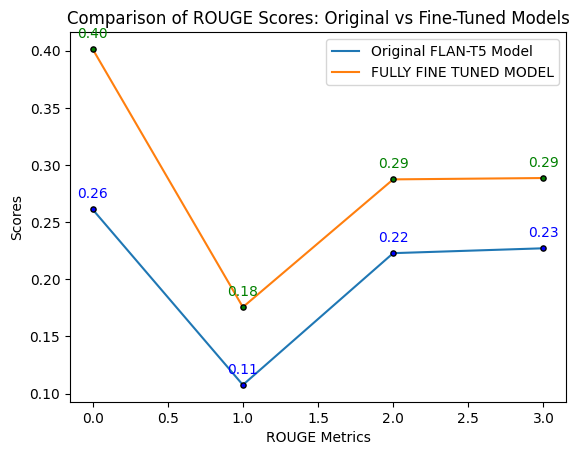

In [37]:
original_model_scores=[original_model_results["rouge1"] ,original_model_results["rouge2"] , original_model_results["rougeL"],original_model_results["rougeLsum"]]
instruct_model_scores=[instruct_model_results["rouge1"] ,instruct_model_results["rouge2"] ,instruct_model_results["rougeL"] ,instruct_model_results["rougeLsum"]]

plt.plot(original_model_scores ,label="Original FLAN-T5 Model")
plt.plot(instruct_model_scores  ,label="FULLY FINE TUNED MODEL")

for i in range(len(original_model_scores)):
    plt.scatter(i, original_model_scores[i], color='blue', s=14, edgecolors='black', zorder=5)
    plt.text(i, original_model_scores[i] + 0.01, f'{original_model_scores[i]:.2f}', ha='center', color='blue')
    plt.scatter(i, instruct_model_scores[i], color='green', s=14, edgecolors='black', zorder=5)  #
    plt.text(i, instruct_model_scores[i] + 0.01, f'{instruct_model_scores[i]:.2f}', ha='center', color='green')
plt.xlabel('ROUGE Metrics')
plt.ylabel('Scores')
plt.title('Comparison of ROUGE Scores: Original vs Fine-Tuned Models')
plt.legend()

In [38]:
print("Absolute percentage improvement of INSTRUCT MODEL over HUMAN BASELINE")

improvement = (np.array(list(instruct_model_results.values())) - np.array(list(original_model_results.values())))
for key, value in zip(instruct_model_results.keys(), improvement):
    print(f'{key}: {value*100:.2f}%')

Absolute percentage improvement of INSTRUCT MODEL over HUMAN BASELINE
rouge1: 14.03%
rouge2: 6.81%
rougeL: 6.45%
rougeLsum: 6.15%


## PARAMETER EFFICIENT FINE TUNING (PEFT)

. PEFT is a technique of Fine Tuning.

. LoRA is the most famous and efficient way of PEFT.

. Very Less params to train and so can be done on a single GPU.

.  After fine-tuning for a specific task, use case, or tenant with LoRA, the result is that the original LLM remains unchanged and a newly-trained “LoRA adapter” emerges

. This LoRA adapter is much, much smaller than the original LLM - on the order of a single-digit % of the original LLM size (MBs vs GBs)


**INFERENCE TIME:**

. At inference time, the LoRA adapter needs to be reunited and combined with its original LLM to serve the inference request.

. The benefit, however, is that many LoRA adapters can re-use the original LLM which reduces overall memory requirements when serving multiple tasks and use cases.

In [86]:
from peft import LoraConfig, get_peft_model, TaskType

lora_config = LoraConfig(
    r=32, # Rank
    lora_alpha=32,
    target_modules=["q", "v"],
    lora_dropout=0.05,
    bias="none",
    task_type=TaskType.SEQ_2_SEQ_LM # FLAN-T5
)

In [87]:
peft_model = get_peft_model(original_model,
                            lora_config)
trainable_params, total_params= print_number_of_trainable_model_params(peft_model)
print("Trainable params: ",trainable_params)
print("All parameters in model: ",total_params)
print(f"% of all params that is training is: {round((trainable_params/total_params)*100 ,2)} %" )

Trainable params:  3538944
All parameters in model:  251116800
% of all params that is training is: 1.41 %


## TRAINING PEFT ADAPTER

In [88]:
output_dir = f'./peft-dialogue-summary-training-{str(int(time.time()))}'

peft_training_args = TrainingArguments(
    output_dir=output_dir,
    auto_find_batch_size=True,
    learning_rate=1e-3,  #Higher learning rate than full fine-tuning.
    num_train_epochs=5,
    logging_steps=1,
)

peft_trainer = Trainer(
    model=peft_model,
    args=peft_training_args,
    train_dataset=tokenized_train,
)


In [89]:

print("Start Training\n")

peft_trainer.train()

print("Training Completed\n")


Start Training



Step,Training Loss
1,47.906900
2,45.015100
3,42.043700
4,38.649900
5,34.528300
6,30.654500
7,28.501200
8,25.784600
9,24.154100
10,21.568200


Training Completed



In [90]:
fine_tuned_peft_model_path = f"{time.time()}/fine_tuned_peft_model"
peft_trainer.save_model(fine_tuned_peft_model_path)
print(f"PEFT model saved at: {fine_tuned_peft_model_path}")

PEFT model saved at: 1737233803.67176/fine_tuned_peft_model


## Saving PEFT ADAPTER

In [91]:
import os

os.listdir("1737228753.2650828")

['fine_tuned_peft_model']

In [92]:

from peft import PeftModel, PeftConfig

peft_model_base = AutoModelForSeq2SeqLM.from_pretrained("google/flan-t5-base", torch_dtype=torch.bfloat16)
tokenizer = AutoTokenizer.from_pretrained("google/flan-t5-base")



peft_model = PeftModel.from_pretrained(
    peft_model_base,
    "1737228753.2650828/fine_tuned_peft_model",  # Path to the fine-tuned PEFT model
    torch_dtype=torch.bfloat16,
    is_trainable=False,  # Ensure the model is loaded for inference only
).to(device)

In [96]:
a,b =print_number_of_trainable_model_params(peft_model)
print("Trainable params",a)
print("Total params",b)

Trainable params 0
Total params 251116800


In [97]:
original_model=original_model.to(device)

In [98]:
device

'cuda'

#### TESTING ON ONE DATA

In [99]:
index = 200
dialogue = dataset['test'][index]['dialogue']
baseline_human_summary = dataset['test'][index]['summary']

prompt = f"""
Summarize the following conversation.

{dialogue}

Summary: """

input_ids = tokenizer(prompt, return_tensors="pt").input_ids

peft_model =peft_model.to(device)
input_ids = input_ids.to(device)

original_model=original_model.to(device)
instruct_model=instruct_model.to(device)


original_model_outputs = original_model.generate(input_ids=input_ids, max_new_tokens=200)
original_model_text_output = tokenizer.decode(original_model_outputs[0], skip_special_tokens=True)

instruct_model_outputs = instruct_model.generate(input_ids=input_ids, max_new_tokens=200)
instruct_model_text_output = tokenizer.decode(instruct_model_outputs[0], skip_special_tokens=True)
peft_model_outputs = peft_model.generate(input_ids=input_ids, max_new_tokens=200)
peft_model_text_output = tokenizer.decode(peft_model_outputs[0], skip_special_tokens=True)

print_smaller_dash()
print(f'BASELINE HUMAN SUMMARY:\n{human_baseline_summary}')
print_smaller_dash()
print(f'ORIGINAL MODEL:\n{original_model_text_output}')
print_smaller_dash()
print(f'INSTRUCT MODEL:\n{instruct_model_text_output}')
print_smaller_dash()
print(f'PEFT MODEL: {peft_model_text_output}')

 _ _ _ _ _ _ _ _ _ _ _ _ _
BASELINE HUMAN SUMMARY:
['Ms. Dawson helps #Person1# to write a memo to inform every employee that they have to change the communication method and should not use Instant Messaging anymore.', 'In order to prevent employees from wasting time on Instant Message programs, #Person1# decides to terminate the use of those programs and asks Ms. Dawson to send out a memo to all employees by the afternoon.', 'Ms. Dawson takes a dictation for #Person1# about prohibiting the use of Instant Message programs in the office. They argue about its reasonability but #Person1# still insists.', '#Person2# arrives late because of traffic jam. #Person1# persuades #Person2# to use public transportations to keep healthy and to protect the environment.', "#Person2# decides to follow #Person1#'s suggestions on quitting driving to work and will try to use public transportations.", '#Person2# complains to #Person1# about the traffic jam, #Person1# suggests quitting driving and taking pu

#### PREDICTING ON 10 DATASETS

In [100]:
dialogues = dataset['test'][0:10]['dialogue']
human_baseline_summaries = dataset['test'][0:10]['summary']

original_model_summaries = []
instruct_model_summaries = []
peft_model_summaries = []


original_model = original_model.to(device)
instruct_model = instruct_model.to(device)
peft_model = peft_model.to(device)


for idx, dialogue in enumerate(dialogues):
    prompt = f"""
Summarize the following conversation.

{dialogue}

Summary: """

    input_ids = tokenizer(prompt, return_tensors="pt").input_ids.to(device)


    human_baseline_text_output = human_baseline_summaries[idx]

    original_model_outputs = original_model.generate(input_ids=input_ids,max_new_tokens=200)
    original_model_text_output = tokenizer.decode(original_model_outputs[0], skip_special_tokens=True)

    instruct_model_outputs = instruct_model.generate(input_ids=input_ids, max_new_tokens=200)
    instruct_model_text_output = tokenizer.decode(instruct_model_outputs[0], skip_special_tokens=True)

    peft_model_outputs = peft_model.generate(input_ids=input_ids, max_new_tokens=200)
    peft_model_text_output = tokenizer.decode(peft_model_outputs[0], skip_special_tokens=True)

    original_model_summaries.append(original_model_text_output)
    instruct_model_summaries.append(instruct_model_text_output)
    peft_model_summaries.append(peft_model_text_output)

zipped_summaries = list(zip(human_baseline_summaries, original_model_summaries, instruct_model_summaries, peft_model_summaries))

df = pd.DataFrame(zipped_summaries, columns = ['human_baseline_summaries', 'original_model_summaries', 'instruct_model_summaries', 'peft_model_summaries'])
df

,human_baseline_summaries,original_model_summaries,instruct_model_summaries,peft_model_summaries
0,Ms. Dawson helps #Person1# to write a memo to ...,a dictation for #Person2#. #Person2# needs to ...,#Person1# asks Ms. Dawson to take a dictation ...,#Person1# asks Ms. Dawson to take a dictation ...
1,In order to prevent employees from wasting tim...,#Person1# needs to take a dictation for #Perso...,#Person1# asks Ms. Dawson to take a dictation ...,#Person1# asks Ms. Dawson to take a dictation ...
2,Ms. Dawson takes a dictation for #Person1# abo...,"First, thank #Person1#.",#Person1# asks Ms. Dawson to take a dictation ...,#Person1# asks Ms. Dawson to take a dictation ...
3,#Person2# arrives late because of traffic jam....,You're finally here! #Person2# is a little stu...,#Person2# got stuck in traffic again. #Person1...,#Person2# is stuck in traffic and #Person2# is...
4,#Person2# decides to follow #Person1#'s sugges...,#Person1# is trying to find a different route ...,#Person2# got stuck in traffic again. #Person1...,#Person2# is stuck in traffic and #Person2# is...
5,#Person2# complains to #Person1# about the tra...,#Person2# got stuck in traffic again. #Person1...,#Person2# got stuck in traffic again. #Person1...,#Person2# is stuck in traffic and #Person2# is...
6,#Person1# tells Kate that Masha and Hero get d...,#Person1# is having a split with his ex Masha ...,Masha and Hero are getting divorced. Kate can'...,Masha and Hero are getting divorced. #Person1#...
7,#Person1# tells Kate that Masha and Hero are g...,#Person1#: #Person1#: #Person1#: #Person1#: #P...,Masha and Hero are getting divorced. Kate can'...,Masha and Hero are getting divorced. #Person1#...
8,#Person1# and Kate talk about the divorce betw...,#Person2# is getting divorced. #Person2# is a ...,Masha and Hero are getting divorced. Kate can'...,Masha and Hero are getting divorced. #Person1#...
9,#Person1# and Brian are at the birthday party ...,You are always popular with everyone. #Person1...,Brian's birthday is coming. #Person1# invites ...,Brian remembers his birthday and asks Brian to...


## COMPARISION OF PEFT VS FULL FINE TUNE MODEL

In [101]:
rouge = evaluate.load('rouge')

original_model_results = rouge.compute(
    predictions=original_model_summaries,
    references=human_baseline_summaries[0:len(original_model_summaries)],
    use_aggregator=True,
    use_stemmer=True,
)

instruct_model_results = rouge.compute(
    predictions=instruct_model_summaries,
    references=human_baseline_summaries[0:len(instruct_model_summaries)],
    use_aggregator=True,
    use_stemmer=True,
)

peft_model_results = rouge.compute(
    predictions=peft_model_summaries,
    references=human_baseline_summaries[0:len(peft_model_summaries)],
    use_aggregator=True,
    use_stemmer=True,
)

print('ORIGINAL MODEL:')
print(original_model_results)
print('INSTRUCT MODEL:')
print(instruct_model_results)
print('PEFT MODEL:')
print(peft_model_results)

ORIGINAL MODEL:
{'rouge1': 0.1858856078581284, 'rouge2': 0.026458036984352774, 'rougeL': 0.14954362650813077, 'rougeLsum': 0.15042040355830072}
INSTRUCT MODEL:
{'rouge1': 0.41026607717457186, 'rouge2': 0.17840645241958838, 'rougeL': 0.2977022096267017, 'rougeLsum': 0.2987374187518165}
PEFT MODEL:
{'rouge1': 0.37481979969611157, 'rouge2': 0.12322869987119058, 'rougeL': 0.27301975996128924, 'rougeLsum': 0.27408429263001977}


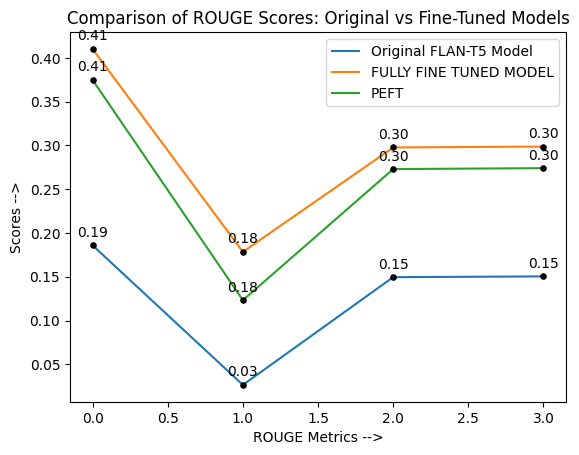

In [109]:
original_model_scores=[original_model_results["rouge1"] ,original_model_results["rouge2"] , original_model_results["rougeL"],original_model_results["rougeLsum"]]
instruct_model_scores=[instruct_model_results["rouge1"] ,instruct_model_results["rouge2"] ,instruct_model_results["rougeL"] ,instruct_model_results["rougeLsum"]]
peft_model_scores= [ peft_model_results["rouge1"] ,peft_model_results["rouge2"] ,peft_model_results["rougeL"] ,peft_model_results["rougeLsum"] ]



plt.plot(original_model_scores ,label="Original FLAN-T5 Model")
plt.plot(instruct_model_scores  ,label="FULLY FINE TUNED MODEL")
plt.plot(peft_model_scores ,label="PEFT")


for i in range(len(original_model_scores)):
    plt.scatter(i, original_model_scores[i], color='black', s=14, edgecolors='black', zorder=5)
    plt.text(i, original_model_scores[i] + 0.01, f'{original_model_scores[i]:.2f}', ha='center', color='black')
    plt.scatter(i, instruct_model_scores[i], color='black', s=14, edgecolors='black', zorder=5)  #
    plt.text(i, instruct_model_scores[i] + 0.01, f'{instruct_model_scores[i]:.2f}', ha='center', color='black')
    plt.scatter(i, peft_model_scores[i], color='black', s=14, edgecolors='black', zorder=5)  #
    plt.text(i, peft_model_scores[i] + 0.01, f'{instruct_model_scores[i]:.2f}', ha='center', color='black')

plt.xlabel('ROUGE Metrics -->')
plt.ylabel('Scores -->')
plt.title('Comparison of ROUGE Scores: Original vs Fine-Tuned Models')
plt.legend()